# Modelling

## Imports

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Feature selection

In [172]:
# Dataset
df = pd.read_csv("datasets/after_pre_processing_no_split.csv")
Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
Test_X_std = pd.read_csv("datasets/Test_X_std.csv")
Train_Y = pd.read_csv("datasets/Train_Y.csv")
Test_Y = pd.read_csv("datasets/Test_Y.csv")

In [173]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010


In [174]:
Train_X_std.head()

,holiday_flag,temperature,fuel_price,cpi,unemployment,month
0,0,1.387482,0.997707,-1.172478,0.428047,8
1,0,-0.433635,-1.017613,0.976518,-0.579850,12
2,0,1.664716,1.026030,-1.175951,0.619144,6
3,0,-0.174411,0.402915,-1.184842,-1.435354,4
4,0,0.793177,1.073962,0.867124,-0.364563,7


In [175]:
Test_X_std.head()

,holiday_flag,temperature,fuel_price,cpi,unemployment,month
0,0,1.431687,-0.109085,1.295626,-0.856417,6
1,1,-0.422175,-0.856387,0.906294,0.604631,12
2,0,0.023145,1.226473,-0.988542,0.509485,9
3,0,0.105005,2.041316,-1.130774,-0.146051,3
4,1,1.112978,-1.793239,0.908392,0.511098,9


In [176]:
Train_Y.head()

,weekly_sales
0,1917397.63
1,2090268.95
2,501780.66
3,1900246.47
4,668390.82


In [177]:
Train_Y = Train_Y["weekly_sales"]

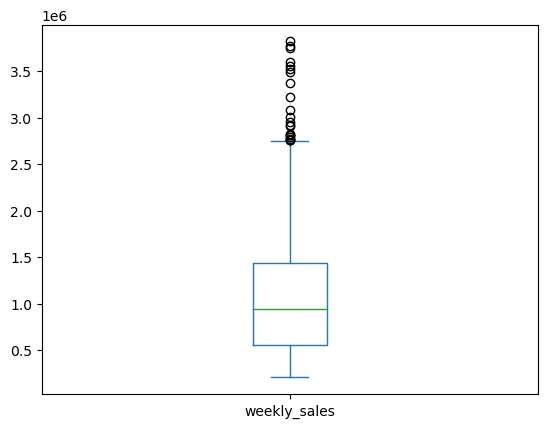

In [178]:
Train_Y.plot(kind="box")
plt.show()

In [179]:
Train_Y.describe()

count    4.760000e+03
mean     1.050347e+06
std      5.702940e+05
min      2.099862e+05
25%      5.563754e+05
50%      9.489712e+05
75%      1.434877e+06
max      3.818686e+06
Name: weekly_sales, dtype: float64

In [180]:
Test_Y.head()

,weekly_sales
0,422965.33
1,1230012.16
2,1232376.49
3,1930814.66
4,434471.38


In [181]:
Test_Y = Test_Y["weekly_sales"]

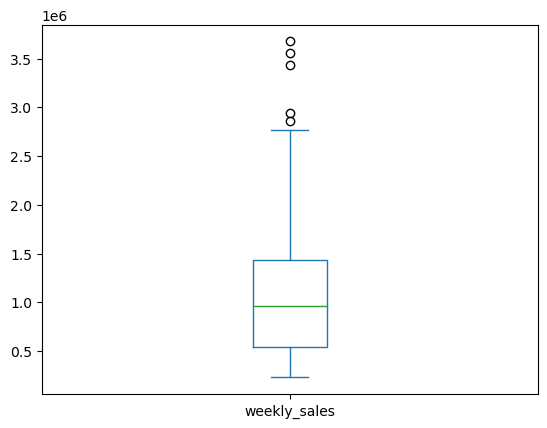

In [182]:
Test_Y.plot(kind="box")
plt.show()

In [183]:
Test_Y.describe()

count    1.191000e+03
mean     1.053662e+06
std      5.804415e+05
min      2.297320e+05
25%      5.409287e+05
50%      9.604761e+05
75%      1.437721e+06
max      3.676389e+06
Name: weekly_sales, dtype: float64

In [184]:
# # One hot encoding the month feature
# Train_X_std = pd.get_dummies(Train_X_std, columns=["month"], drop_first=True)
# Test_X_std = pd.get_dummies(Test_X_std, columns=["month"], drop_first=True)
# df = pd.get_dummies(df, columns=["month"], drop_first=True)

## Preliminary models

- Here, I will perform preliminary evaluation of a few models with no parameter tuning to get a feel for their effectiveness

### Linear regression

Test-> 572920.0410890455. Train-> 562881.3294543353.


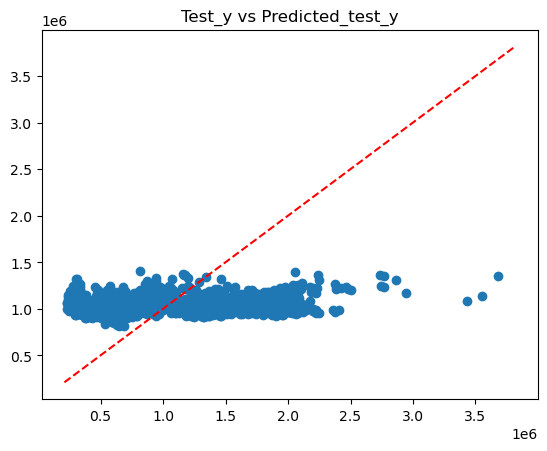

In [185]:
lr = LinearRegression().fit(Train_X_std, Train_Y)

ypred_test = lr.predict(Test_X_std)
ypred_train = lr.predict(Train_X_std)
print(f"Test-> {MSE(Test_Y,ypred_test)**(1/2)}. Train-> {MSE(Train_Y, ypred_train)**(1/2)}.") 

plt.title("Test_y vs Predicted_test_y")
plt.scatter(Test_Y, ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], "r--")
plt.show()

### Ridge regression

Test-> 572920.1320417419. Train-> 562881.3305545858.


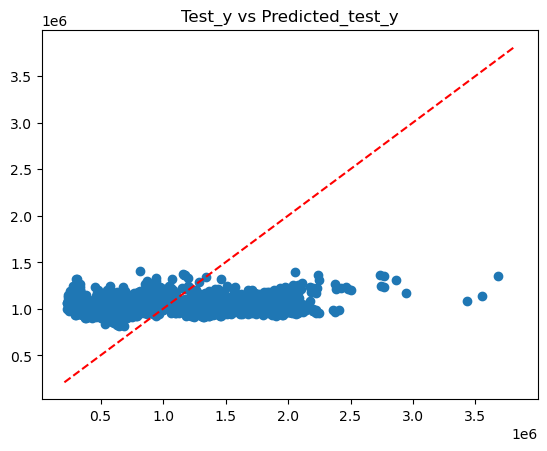

In [186]:
ridge = Ridge().fit(Train_X_std, Train_Y)

ypred_test = ridge.predict(Test_X_std)
ypred_train = ridge.predict(Train_X_std)
print(f"Test-> {MSE(Test_Y,ypred_test)**(1/2)}. Train-> {MSE(Train_Y,ypred_train)**(1/2)}.")

plt.title("Test_y vs Predicted_test_y")
plt.scatter(Test_Y, ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], "r--")
plt.show()

### Lasso regression

Test-> 572920.046477722. Train-> 562881.3294715781.


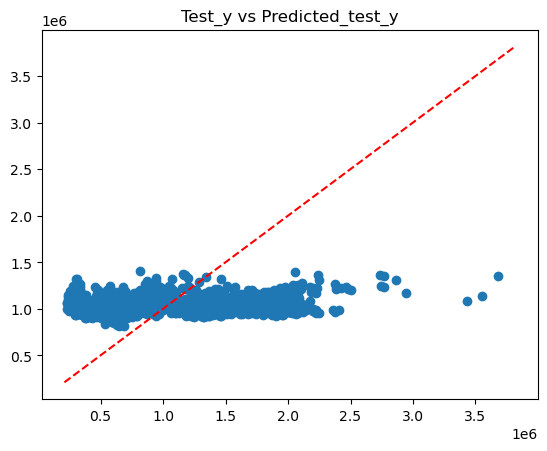

In [187]:
lasso = Lasso().fit(Train_X_std, Train_Y)

ypred_test = lasso.predict(Test_X_std)
ypred_train = lasso.predict(Train_X_std)
print(f"Test-> {MSE(Test_Y,ypred_test)**(1/2)}. Train-> {MSE(Train_Y,ypred_train)**(1/2)}.")

plt.title("Test_y vs Predicted_test_y")
plt.scatter(Test_Y, ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], "r--")
plt.show()

### Random forest regression

Test-> 523144.5272790872. Train-> 262196.85526494274.


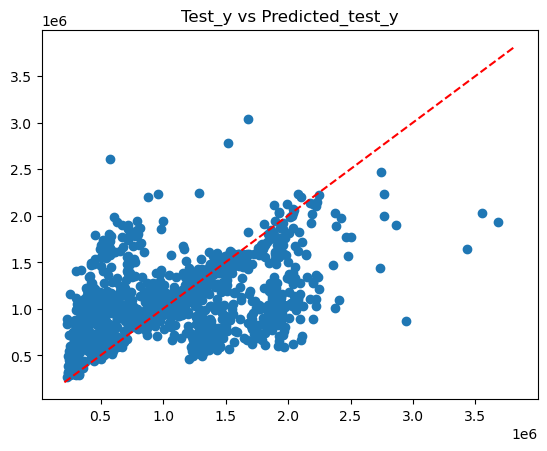

In [188]:
SEED = 123
rf = RandomForestRegressor(random_state=SEED)
rf.fit(Train_X_std, Train_Y)

ypred_test = rf.predict(Test_X_std)
ypred_train = rf.predict(Train_X_std)
print(f"Test-> {MSE(Test_Y,ypred_test)**(1/2)}. Train-> {MSE(Train_Y,ypred_train)**(1/2)}.")

plt.title("Test_y vs Predicted_test_y")
plt.scatter(Test_Y, ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], "r--")
plt.show()

**NOTE:**
- On initial evaluation, Random forest regression appears to be our best model and shows the strongest correlation between predicted y and actual y.
- However, this is likely due to overfitting.
- Cross validation, model tuning and evaluation will produce more information.

## Cross validation

### Ridge regression CV

In [189]:
alphas = [0.1, 1, 10, 100, 1000, 10000]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(Train_X_std,Train_Y)
    ridge_scores.append(ridge.score(Test_X_std,Test_Y))

[i for i in zip(alphas,ridge_scores)]

[(0.1, 0.024929776570555617),
 (1, 0.02492949791137067),
 (10, 0.024926688382951534),
 (100, 0.02489838091871366),
 (1000, 0.024353819548648792),
 (10000, 0.015541684425771973)]

In [190]:
ind = np.argsort(ridge_scores)[-1]
ALPHA_RIDGE = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 0.1 appears to be the best


In [191]:
ridge = Ridge(alpha=ALPHA_RIDGE).fit(Train_X_std,Train_Y)

ypred_test = ridge.predict(Test_X_std)
ypred_train = ridge.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),". Train-> ",MSE(Train_Y,ypred_train)**(1/2))

Test->  572920.0501761392 . Train->  562881.329465387


### Lasso regression CV

In [192]:
alphas = [0.1, 1, 10, 100, 1000, 10000]
lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha).fit(Train_X_std,Train_Y)
    lasso_scores.append(lasso.score(Test_X_std,Test_Y))

[i for i in zip(alphas,lasso_scores)]

[(0.1, 0.024929805605642397),
 (1, 0.024929789159455207),
 (10, 0.0249296283156909),
 (100, 0.024927191102993462),
 (1000, 0.024849387176454574),
 (10000, 0.023641471258934676)]

In [193]:
ind = np.argsort(lasso_scores)[-1]
ALPHA_LASSO = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 0.1 appears to be the best


In [194]:
lasso = Lasso(alpha=ALPHA_LASSO).fit(Train_X_std,Train_Y)

ypred_test = lasso.predict(Test_X_std)
ypred_train = lasso.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),". Train-> ",MSE(Train_Y,ypred_train)**(1/2))

Test->  572920.0416460953 . Train->  562881.3294545073


### Random forest regression CV

In [195]:
rf = RandomForestRegressor(random_state=SEED)
params_rf={"n_estimators":[300,400,500],"max_depth":[4,6,8],"min_samples_leaf":[0.1,0.2],"max_features":["log2","sqrt"]}
grid_rf = GridSearchCV(estimator=rf,param_grid=params_rf,cv=3,scoring="neg_mean_squared_error",verbose=1,n_jobs=-1)
grid_rf.fit(Train_X_std,Train_Y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [196]:
grid_rf.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 400}

Test->  564437.1070626242 Train->  555754.5778835363


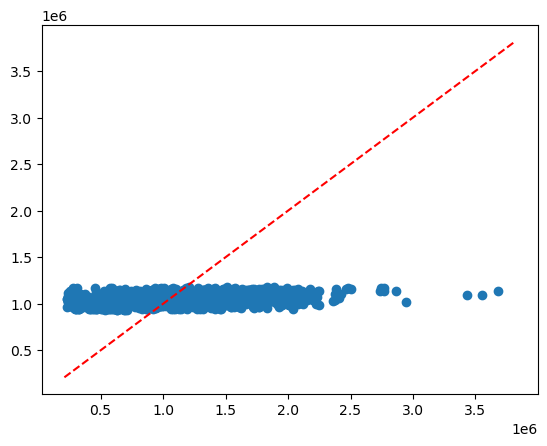

In [197]:
best_rf_model = grid_rf.best_estimator_
ypred_test = best_rf_model.predict(Test_X_std)
ypred_train = best_rf_model.predict(Train_X_std)
print("Test-> ",MSE(Test_Y,ypred_test)**(1/2),"Train-> ",MSE(Train_Y,ypred_train)**(1/2))

plt.scatter(Test_Y,ypred_test)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
plt.show()

**NOTE:**
- The best parameters based on test RMSE appear to be:
    - Alpha of 0.1 (for lasso and ridge)
    - Random forest with {"max_depth": 6, "max_features": "log2", "min_samples_leaf": 0.1, "n_estimators": 400}

## Evaluation functions

In [198]:
# Model_Evaluation_Comparison_Matrix or MECM
columns = ["Train-R2","Test-R2","Train-RSS","Test-RSS","Train-MSE","Test-MSE","Train-RMSE","Test-RMSE"]
MECM = pd.DataFrame(np.zeros([1,len(columns)]),columns=columns)

In [199]:
# Function to evaluate models
def Evaluate(row_index,pred_train,pred_test):
    # Evaluating the given model
    print("\n\n{}Training Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Training set --->",round(r2_score(Train_Y,pred_train),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Train_Y-pred_train)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(MSE(Train_Y,pred_train),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(MSE(Train_Y,pred_train)),20))
    
    print("\n{}Testing Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Testing set --->",round(r2_score(Test_Y,pred_test),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Test_Y-pred_test)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(MSE(Test_Y,pred_test),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(MSE(Test_Y,pred_test)),20))
    print("\n{}Residual Plots{}".format("-"*20,"-"*20))
    
    MECM.loc[row_index,"Train-R2"]  = round(r2_score(Train_Y,pred_train),20)
    MECM.loc[row_index,"Test-R2"]   = round(r2_score(Test_Y,pred_test),20)
    MECM.loc[row_index,"Train-RSS"] = round(np.sum(np.square(Train_Y-pred_train)),20)
    MECM.loc[row_index,"Test-RSS"]  = round(np.sum(np.square(Test_Y-pred_test)),20)
    MECM.loc[row_index,"Train-MSE"] = round(MSE(Train_Y,pred_train),20)
    MECM.loc[row_index,"Test-MSE"]  = round(MSE(Test_Y,pred_test),20)
    MECM.loc[row_index,"Train-RMSE"] = round(np.sqrt(MSE(Train_Y,pred_train)),20)
    MECM.loc[row_index,"Test-RMSE"] = round(np.sqrt(MSE(Test_Y,pred_test)),20)
    
    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])
    
    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred_train))
    plt.title("Error Terms")
    plt.xlabel("Errors")
    
    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred_train)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()],"r--")
    plt.title("Test vs Prediction")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

In [200]:
def Evaluate_All():
    # Linear regression Model
    MLR = LinearRegression().fit(Train_X_std, Train_Y)
    pred_train = MLR.predict(Train_X_std)
    pred_test = MLR.predict(Test_X_std)
    print("{}{} Evaluating Multiple Linear Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",MLR.intercept_)
    Evaluate(0, pred_train, pred_test)
    
    # Ridge regression Model
    RLR = Ridge(alpha = ALPHA_RIDGE).fit(Train_X_std,Train_Y)
    pred_train = RLR.predict(Train_X_std)
    pred_test = RLR.predict(Test_X_std)
    print("{}{} Evaluating Ridge Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",RLR.intercept_)
    Evaluate(1,pred_train,pred_test)
    
    # Lasso Regression Model
    LLR = Lasso(alpha = ALPHA_LASSO).fit(Train_X_std,Train_Y)
    pred_train = LLR.predict(Train_X_std)
    pred_test = LLR.predict(Test_X_std)
    print("{}{} Evaluating Lasso Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regression Model was found to be ",LLR.intercept_)
    Evaluate(2,pred_train,pred_test)
    
    # Random Forest Regression Model
    best_rf_model.fit(Train_X_std,Train_Y)
    pred_train = best_rf_model.predict(Train_X_std)
    pred_test = best_rf_model.predict(Test_X_std)
    print("{}{} Evaluating Random Forest Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    Evaluate(3,pred_train,pred_test)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  952450.1627862677


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.025622354932681835
Residual Sum of Squares (RSS) on Training set  ---> 1508136461389812.5
Mean Squared Error (MSE) on Training set       ---> 316835391048.2799
Root Mean Squared Error (RMSE) on Training set ---> 562881.3294543353

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.02492980750176299
Residual Sum of Squares (RSS) on Training set  ---> 390930711816435.0
Mean Squared Error (MSE) on Training set       ---> 328237373481.4736
Root Mean Squared Error (RMSE) on Training set ---> 572920.0410890455

--------------------Residual Plots--------------------


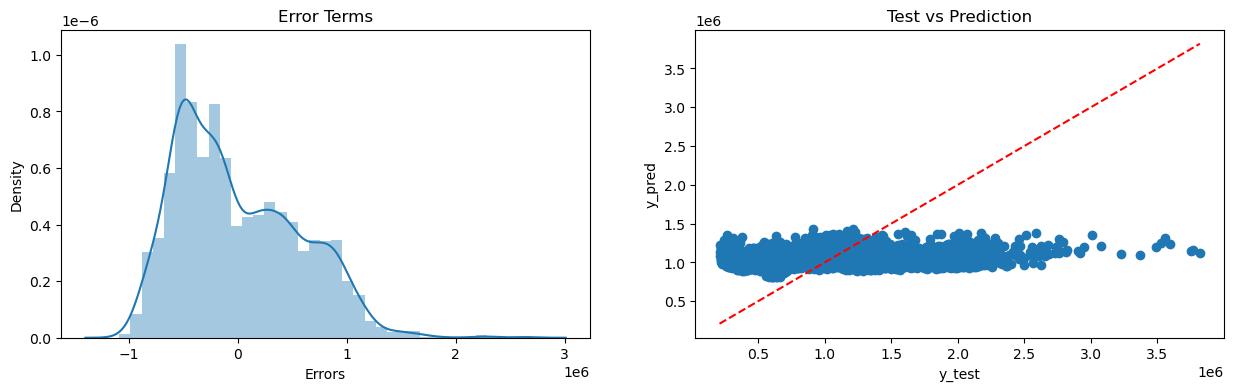

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  952450.1007273225


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.025622354894419327
Residual Sum of Squares (RSS) on Training set  ---> 1508136461449035.0
Mean Squared Error (MSE) on Training set       ---> 316835391060.7216
Root Mean Squared Error (RMSE) on Training set ---> 562881.329465387

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.024929776570555617
Residual Sum of Squares (RSS) on Training set  ---> 390930724217551.4
Mean Squared Error (MSE) on Training set       ---> 328237383893.8299
Root Mean Squared Error (RMSE) on Training set ---> 572920.0501761392

--------------------Residual Plots--------------------


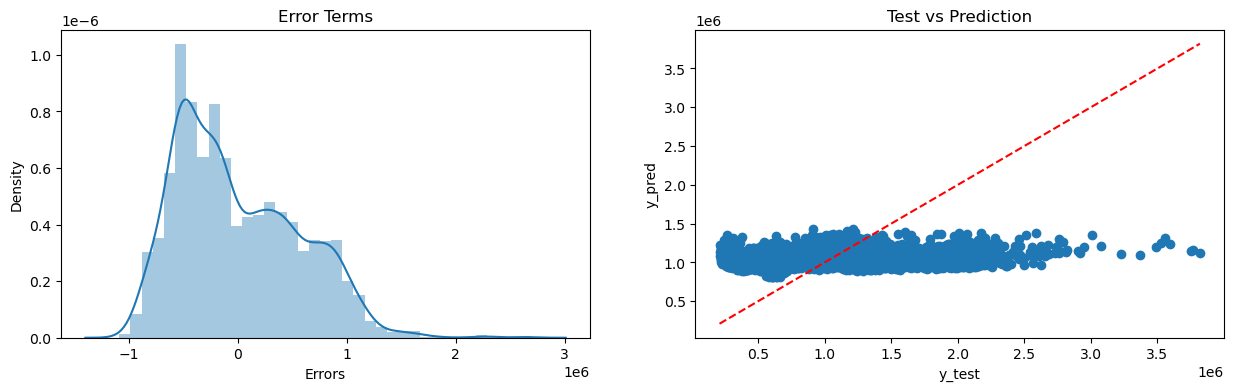

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regression Model was found to be  952450.2032172383


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.0256223549320862
Residual Sum of Squares (RSS) on Training set  ---> 1508136461390734.5
Mean Squared Error (MSE) on Training set       ---> 316835391048.47363
Root Mean Squared Error (RMSE) on Training set ---> 562881.3294545073

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0249298056056424
Residual Sum of Squares (RSS) on Training set  ---> 390930712576638.5
Mean Squared Error (MSE) on Training set       ---> 328237374119.7637
Root Mean Squared Error (RMSE) on Training set ---> 572920.0416460953

--------------------Residual Plots--------------------


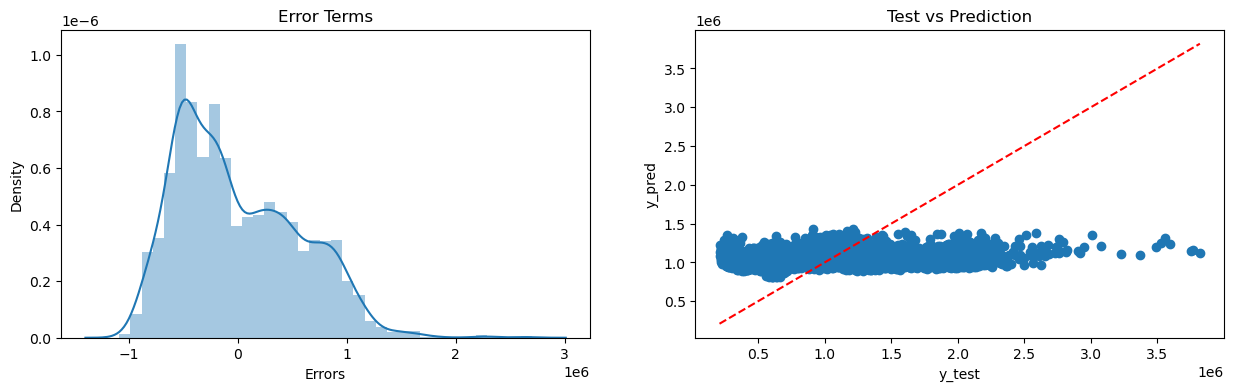

<<<----------------------------------- Evaluating Random Forest Regression Model ----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.050139731655679316
Residual Sum of Squares (RSS) on Training set  ---> 1470188597991296.5
Mean Squared Error (MSE) on Training set       ---> 308863150838.5077
Root Mean Squared Error (RMSE) on Training set ---> 555754.5778835363

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.05359077208725038
Residual Sum of Squares (RSS) on Training set  ---> 379439794164606.06
Mean Squared Error (MSE) on Training set       ---> 318589247829.22424
Root Mean Squared Error (RMSE) on Training set ---> 564437.1070626242

--------------------Residual Plots--------------------


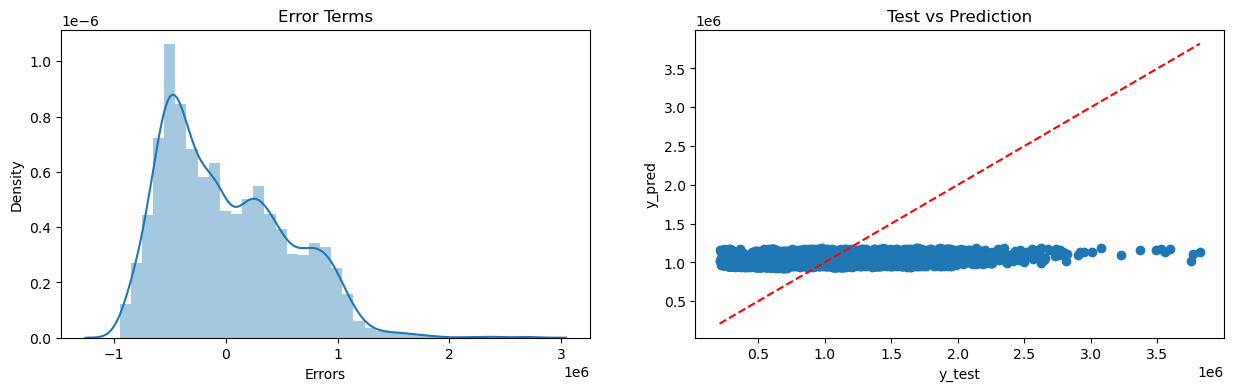

In [201]:
Evaluate_All()

## Comparing the model evaluation metrics

In [202]:
MECM

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
1,0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176
2,0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
3,0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063


In [203]:
MECM.index = ["Multiple Linear Regression (MLR)","Ridge Linear Regression (RLR)",
              "Lasso Linear Regression (LLR)","Random Forest Regression Model (RF)"]
MECM

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
Ridge Linear Regression (RLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176
Lasso Linear Regression (LLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
Random Forest Regression Model (RF),0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063


In [204]:
MECM.sort_values("Train-R2",ascending=False)

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063
Multiple Linear Regression (MLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
Lasso Linear Regression (LLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
Ridge Linear Regression (RLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176


In [205]:
MECM.sort_values("Test-R2",ascending=False)

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063
Multiple Linear Regression (MLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
Lasso Linear Regression (LLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
Ridge Linear Regression (RLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176


In [206]:
MECM.sort_values("Train-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063
Multiple Linear Regression (MLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
Lasso Linear Regression (LLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
Ridge Linear Regression (RLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176


In [207]:
MECM.sort_values("Test-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Random Forest Regression Model (RF),0.050140,0.053591,1.470189e+15,3.794398e+14,3.088632e+11,3.185892e+11,555754.577884,564437.107063
Multiple Linear Regression (MLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329454,572920.041089
Lasso Linear Regression (LLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329455,572920.041646
Ridge Linear Regression (RLR),0.025622,0.024930,1.508136e+15,3.909307e+14,3.168354e+11,3.282374e+11,562881.329465,572920.050176


### RMSE comparisons

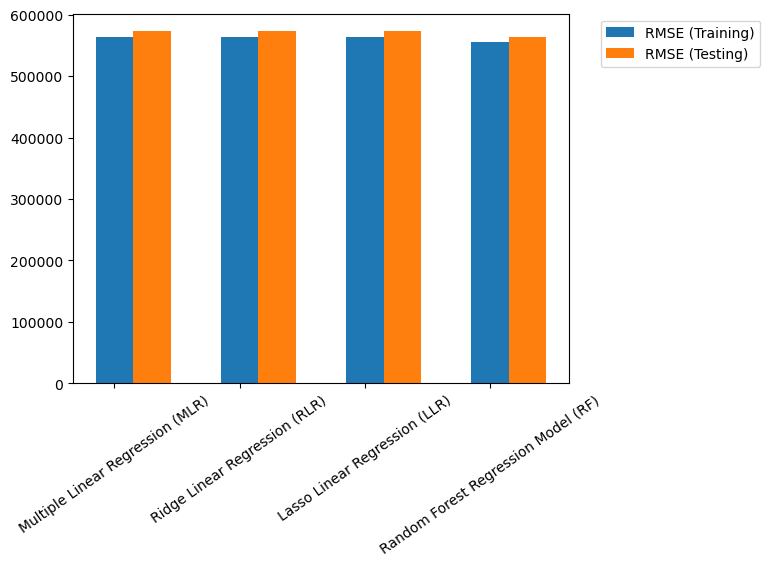

In [208]:
columns = MECM.columns
n = MECM.shape[0]

plt.bar(np.arange(n), MECM["Train-RMSE"], width=0.3, label="RMSE (Training)")
plt.bar(np.arange(n)+0.3, MECM["Test-RMSE"], width=0.3, label="RMSE (Testing)")
plt.xticks(np.arange(n), MECM.index, rotation=35)
plt.legend(bbox_to_anchor=(1.05,1.0), loc="upper left")
plt.show()

### Inference
- Lower RMSE and higher R2 score implies a better the model. That said, a significant disparity between training and testing scores would suggest overfitting.
- All regression models were fairly similar in terms of training and test R2 and RMSE.
- However, Multiple linear regression performed well in training metrics but worst in test metrics suggesting that it was slightly overfitting.
    - This is in line with what we would expect from lasso and ridge regression which work to combat overfitting.
- **Random forest regression** performed best for all metrics and gave the best overall results.

# Conclusions

Here are some key conclusions:
- The dataset was quite small with just 6435 samples initially, which dropped 7.5% after cleaning.
- Cross validating the Lasso and Ridge regressions allowed us to select the best alpha.
- We will proceed with the **Random forest regression model** as it performed best.

# Further steps
These are some further steps to consider:
- using pca for feature reduction
- using more of the generated features in the regression
- testing more parameters in the grid search cv at the cost of time
- using random forest with bagging, boosting etc
- using a polynomial regression model
- using some time series techniques for prediction
- including store-to-store-differences